In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df =  pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


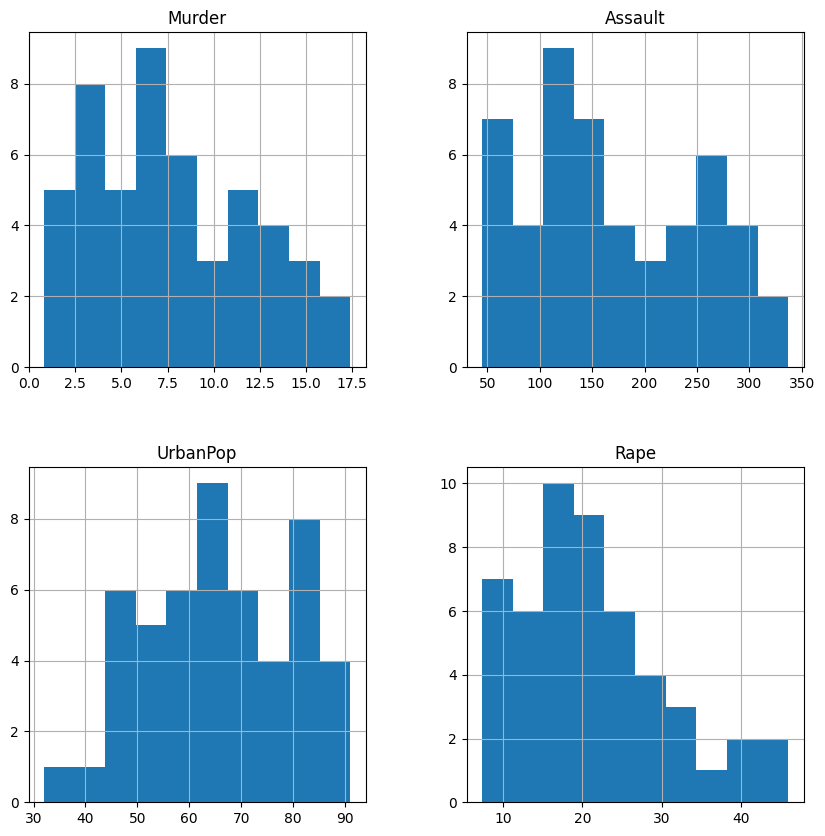

In [7]:
df.hist(figsize=(10,10));

In [9]:
# Model

In [10]:
kmeans = KMeans(n_clusters=4)

In [11]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
kmeans_fit = kmeans.fit(df)

In [14]:
kmeans_fit.n_clusters # küme sayısı

4

In [16]:
kmeans_fit.cluster_centers_ # kümelerin merkez noktaları

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [18]:
kmeans_fit.labels_ # gözlemlerin ait oldukları kümeler

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

In [20]:
# Kümelerin Görselleştirilmesi

In [51]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [52]:
kumeler = k_fit.labels_

In [53]:
merkezler = k_fit.cluster_centers_

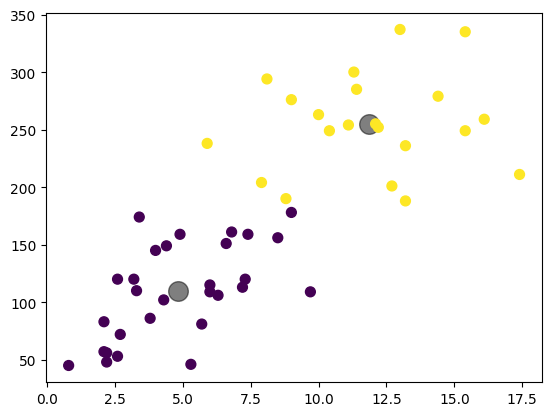

In [54]:
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5); # kümelerin merkezleri

plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis"); # kümelerin elemanları

In [55]:
# Optimum Küme Sayısının Belirlenmesi

In [56]:
#Elbow Yöntemi

In [59]:
ssd = []
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)


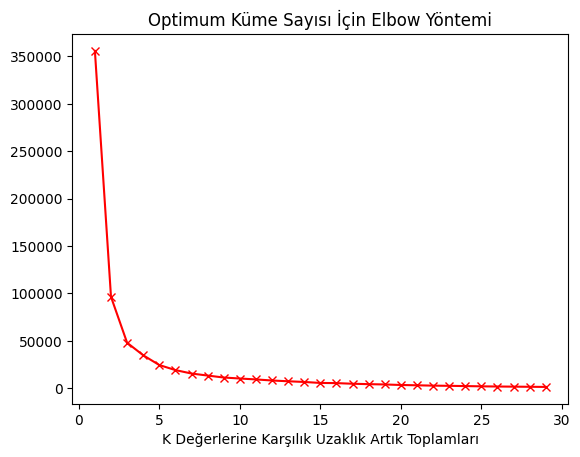

In [60]:
plt.plot(K, ssd, "rx-")
plt.xlabel("K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi");

In [61]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19), k=(2, 20))

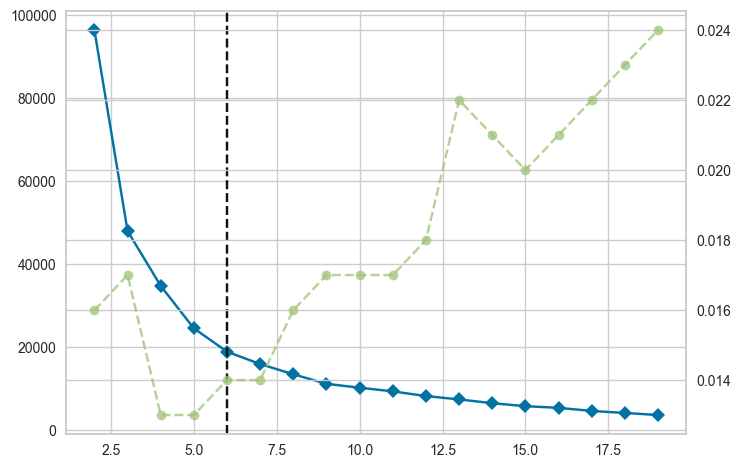

In [64]:
visu = KElbowVisualizer(KMeans(), k=(2,20))
visu.fit(df)

In [65]:
# Final Model

In [66]:
kmeans = KMeans(4).fit(df)

In [67]:
kumeler = kmeans.labels_

In [71]:
pd.DataFrame({
    "Eyaletler": df.index,
    "Kume_NO": kumeler
}).head()

,Eyaletler,Kume_NO
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,1
4,California,2


In [69]:
df["Kume_NO"] = kumeler

In [70]:
df.head()

,Murder,Assault,UrbanPop,Rape,Kume_NO
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
